In [571]:
import pandas as pd
from datetime import datetime
import math
from scipy.stats import chi2_contingency

flights=pd.read_excel(r'C:\Users\ssuni\OneDrive\Desktop\sunilkumar\601\Mainproject\flights2DCMDVA.xlsx')
plains=pd.read_csv(r'C:\Users\ssuni\OneDrive\Desktop\sunilkumar\601\Mainproject\planes.csv')
flights1=pd.read_csv(r'C:\Users\ssuni\OneDrive\Desktop\sunilkumar\601\Mainproject\flights.csv')
federal_holidays=pd.read_excel(r"C:\Users\ssuni\OneDrive\Desktop\sunilkumar\601\Mainproject\federal-holidays-2013.xlsx")
weatherNYhourly_df=pd.read_csv(r'C:\Users\ssuni\OneDrive\Desktop\sunilkumar\601\Mainproject\weatherNYhourly.csv')


In [572]:
#1.a
merged_df1= pd.merge(flights, plains, on='tailnum', how='inner')
seat = merged_df1.groupby(["origin","dest"])["seats"].sum()
print(seat)


origin  dest
EWR     BWI      46459
        DCA      94793
        IAD      67854
JFK     BWI      47540
        DCA      96462
        IAD     121530
LGA     BWI       2136
        DCA     714970
        IAD     106620
Name: seats, dtype: int64


In [573]:
#1.b

flights["DATE"]=pd.to_datetime(flights[["year","month","day"]])
flights_by_day = flights.groupby(['year','month','day'])['flight'].count().sort_values(ascending=False).head(1)
print(flights_by_day)


year  month  day
2013  1      17     61
Name: flight, dtype: int64


In [574]:
#1 c
merged_df2= pd.merge(flights, plains, on='tailnum', how='inner')
#print(merged_df2)
seats_by_day = merged_df2.groupby(['year_x','month','day'])['seats'].sum().sort_values(ascending=False).head(1)
print(seats_by_day)

year_x  month  day
2013    2      28     5379
Name: seats, dtype: int64


In [575]:
## Question/Task 2

flights1['cancelled']=flights1['dep_time'].apply(lambda x:1 if math.isnan(x) else 0)
flights1["DATE"]=pd.to_datetime(flights1[["year","month","day"]])

In [576]:
#2.a
cancellation_df=flights1[flights1["dep_time"].isnull()]
cancellation_df["DATE"]=pd.to_datetime(cancellation_df[["year","month","day"]])
cancellation_by_day = cancellation_df.groupby(['DATE'])['flight'].count().sort_values(ascending=False)
print(cancellation_by_day.head(1))


DATE
2013-02-08    223
Name: flight, dtype: int64


C:\Users\ssuni\AppData\Local\Temp\ipykernel_24500\2788413451.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancellation_df["DATE"]=pd.to_datetime(cancellation_df[["year","month","day"]])


In [577]:
#2b

weatherNYhourly_df["DATE"]=pd.to_datetime(weatherNYhourly_df[["year","month","day"]])

cancelled_flights_df = flights1[flights1['cancelled'] == 1]

merged_weather_df = cancelled_flights_df.merge(weatherNYhourly_df, on='DATE')
    
temperature_cancelled = merged_weather_df['temp']

temperature_not_cancelled = weatherNYhourly_df[~weatherNYhourly_df['DATE'].isin(cancelled_flights_df['DATE'])]['temp']

contingency_table = pd.crosstab(temperature_cancelled,temperature_not_cancelled)

# Perform the chi-square test of independence
chi2, p_value, _, _ = chi2_contingency(contingency_table)

print("chi2:{} p-value:{}".format(chi2,p_value))


chi2:7464.415387656261 p-value:1.961865982633724e-13


In [578]:
#2c
from scipy.stats import pearsonr

federal_holidays.columns=['DATE','holiday','weekday']
federal_holidays=federal_holidays[1:11]
federal_holidays['DATE']=pd.to_datetime(federal_holidays['DATE'])

merged_holiday_df=pd.merge(federal_holidays,flights1,how='right')

merged_holiday_df=merged_holiday_df.fillna(0)
merged_holiday_df.loc[merged_holiday_df.holiday!=0,'holiday']=1
merged_holiday_df
#corr,_=pearsonr(merged_holiday_df[])

corr,_=pearsonr(merged_holiday_df['holiday'],merged_holiday_df['cancelled'])
print("pearsonr correlation:%.3f"%corr)



pearsonr correlation:-0.015


In [579]:
#2d


merged_flights_cancelled= pd.merge(flights1, plains, on='tailnum', how='inner')

total_seats_cancelled = merged_flights_cancelled[merged_flights_cancelled['cancelled'] == 1]['seats'].sum()

print("total no of flights cancelled {}".format(merged_flights_cancelled[merged_flights_cancelled['cancelled']== 1]['flight'].count()))

average_flight_price = 50
total_economic_loss = total_seats_cancelled * average_flight_price

print("total economic loss is {} dollars".format(total_economic_loss))

total no of flights cancelled 1922
total economic loss is 8068300 dollars


In [580]:
#2e

#print(flights1.columns)
cancelled_flights=flights1[flights1['cancelled']==1]

cancelled_data=cancelled_flights.groupby(["carrier"])["DATE"].count().sort_values(ascending=False)


Not_cancelled_flights=flights1[flights1['cancelled']==0]

plained_data=Not_cancelled_flights.groupby(["carrier"])["DATE"].count().sort_values(ascending=False)

merged_data_all=pd.merge(cancelled_data,plained_data,on='carrier')

merged_data_all.columns=['cancelled_flights','plained_flights']
merged_data_all['ratio']=merged_data_all['plained_flights']/merged_data_all['cancelled_flights']


most_reliable = merged_data_all.sort_values("ratio").index[0]
least_reliable = merged_data_all.sort_values("ratio").index[-1]
print("Most reliable airline company:", most_reliable)
print("Least reliable airline company:", least_reliable)

Most reliable airline company: YV
Least reliable airline company: F9


In [581]:
print(flights1.columns)

Index(['Unnamed: 0', 'year', 'month', 'day', 'dep_time', 'dep_delay',
       'arr_time', 'arr_delay', 'carrier', 'tailnum', 'flight', 'origin',
       'dest', 'air_time', 'distance', 'hour', 'minute', 'cancelled', 'DATE'],
      dtype='object')


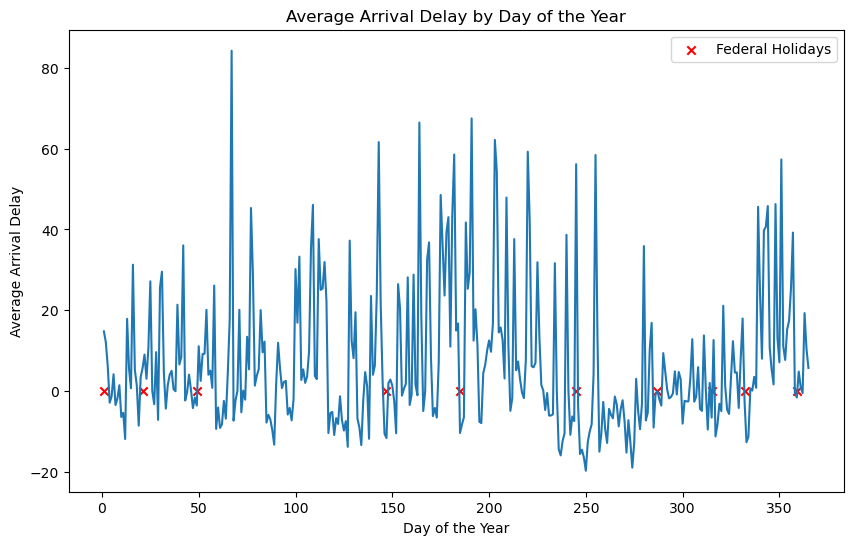

In [582]:
#3A


# Convert date columns to datetime format
import matplotlib.pyplot as plt

# Group flights by date and calculate average arrival delay
daily_avg_delay = flights1.groupby(flights1['DATE'].dt.dayofyear)['arr_delay'].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(1, 366), daily_avg_delay)
plt.scatter(federal_holidays['DATE'].dt.dayofyear, [0] * len(federal_holidays), color='red', marker='x', label='Federal Holidays')
plt.xlabel('Day of the Year')
plt.ylabel('Average Arrival Delay')
plt.title('Average Arrival Delay by Day of the Year')
plt.legend()
plt.show()

In [583]:
#3b

merged_df = flights1.merge(weatherNYhourly_df, on='DATE')

# Calculate Pearson correlation coefficient between arrival delay and weather variables
corr_coeff = merged_df[['arr_delay', 'temp', 'precip', 'humid']].corr().loc['arr_delay', ['temp', 'precip', 'humid']]

print(corr_coeff)

temp      0.033702
precip    0.066841
humid     0.141383
Name: arr_delay, dtype: float64


In [584]:
#3c

holiday_avg_delay = flights1[flights1['DATE'].isin(federal_holidays['DATE'])]['arr_delay'].reset_index()

non_holiday_avg_delay = flights1[~flights1['DATE'].isin(federal_holidays['DATE'])]['arr_delay'].reset_index()

# Perform t-test to compare average arrival delay on holidays and non-holidays
t_stat, p_value = ttest_ind(holiday_avg_delay, non_holiday_avg_delay)

print("t_stat {} \np_value {}".format(t_stat[0], p_value[0]))

t_stat 3.3902096390179297 
p_value 0.0006985770754467987


In [585]:
#3d

avg_delay = flights.groupby('dest')['arr_delay'].mean()
most_reliable= avg_delay.idxmin()
least_reliable= avg_delay.idxmax()

print("most_reliable :{}".format(most_reliable))
print("least_reliable :{}".format(least_reliable))

most_reliable :DCA
least_reliable :IAD


In [586]:
#3e

avg_delay = flights.groupby('carrier')['arr_delay'].mean()
most_reliable= avg_delay.idxmin()
least_reliable= avg_delay.idxmax()

print("most_reliable :{}".format(most_reliable))
print("least_reliable :{}".format(least_reliable))

most_reliable :DL
least_reliable :YV


In [587]:
#3f

avg_delay_of_week = flights1.groupby('DATE')['arr_delay'].mean()
avg_delay = avg_delay_of_week.idxmax()

print("average delay : {}".format(avg_delay))

average delay : 2013-03-08 00:00:00


In [588]:
#3g

flights1['hour'] = flights1['dep_time'] // 100
time_of_day_labels = ['Morning', 'Noon', 'Afternoon', 'Evening']
time_of_day_ranges = [(6, 10), (11, 14), (15, 17), (18, 22)]

avg = []
for start_hour, end_hour in time_of_day_ranges:
    avg.append(flights1[(flights1['hour'] >= start_hour) & (flights1['hour'] <= end_hour)]['arr_delay'].mean())

time_of_day= time_of_day_labels[avg.index(max(avg))]

print(time_of_day)

Evening


In [589]:
#3h

merged_flight_data=merged_df1.groupby(['manufacturer'])["flight"].nunique().reset_index()

print(merged_flight_data[merged_flight_data['manufacturer'].isin(['BOEING','EMBRAER','AIRBUS'])])


  manufacturer  flight
0       AIRBUS       2
2       BOEING      35
7      EMBRAER     212


In [590]:
#4

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

test_data=pd.read_excel(r"C:\Users\ssuni\OneDrive\Desktop\sunilkumar\601\Mainproject\flights_test_data.xlsx")

test_data["DATE"]=pd.to_datetime(test_data[["year","month","day"]])

merged_df = pd.merge(flights1, test_data,how='inner')

selected_features = merged_df[['year','month','day','carrier','origin','dest','distance','arr_delay']]

selected_features.dropna(inplace=True)
X = selected_features
y = selected_features.pop('arr_delay')
X=pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

rmse = mse ** 0.5
r_squared = model.score(X_test, y_test)



#RMSE value gives us an idea of the average prediction error, while the R-squared value indicates the proportion of the variance in the target variable that can be explained by the model.


print("linear regression score ",model.score(X_test,y_test))
print("Root Mean Squared Error (RMSE):", rmse)
print("Coefficient of Determination (R-squared):", r_squared)
print("predict analysis:",y_pred)


linear regression score  -0.5694052029731711
Root Mean Squared Error (RMSE): 25.728368736876824
Coefficient of Determination (R-squared): -0.5694052029731711
predict analysis: [  1.21264965  -1.34387395  19.84076295  11.65010759   0.7320938
  14.24617229 -16.08875567  22.15474151  -1.34387395  -0.68794905
  22.15474151 -12.97385452  22.15474151  -1.34387395  11.65010759
   0.7320938   38.26203018  19.84076295  -1.34387395  22.48865707
   1.21264965  11.65010759  -1.34387395   1.21264965  11.65010759
  22.15474151  22.15474151 -16.08875567  -6.34823971   7.28664192]


C:\Users\ssuni\AppData\Local\Temp\ipykernel_24500\1077748146.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features.dropna(inplace=True)


In [591]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

test_data=pd.read_excel(r"C:\Users\ssuni\OneDrive\Desktop\sunilkumar\601\Mainproject\flights_test_data.xlsx")

test_data["DATE"]=pd.to_datetime(test_data[["year","month","day"]])

cancelled=cancelled_flights[['DATE','carrier', 'origin', 'dest','distance','cancelled']]
merged_df = pd.merge(test_data,cancelled,on=['DATE','carrier', 'origin', 'dest','distance'],how='left')

merged_df = merged_df.drop_duplicates()
#merged_df = merged_df.drop('index', axis=1)
#print(merged_df.sort_values('DATE'))

selected_features = ['carrier', 'origin', 'dest', 'distance']

X = merged_df[selected_features]
y = merged_df['cancelled'].fillna(0.0)

X=pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

rmse = mse ** 0.5
r_squared = model.score(X_test, y_test)

print("LogisticRegression score ",model.score(X_test,y_test))
print("Root Mean Squared Error (RMSE):", rmse)
print("Coefficient of Determination (R-squared):", r_squared)
print("predict analysis:",y_pred)
print("Accuracy:", accuracy)

#A score of 1.0 indicates that the model perfectly fits the training data. It suggests that the model can explain 100% of the variance in the target variable based on the given features.



LogisticRegression score  1.0
Root Mean Squared Error (RMSE): 0.0
Coefficient of Determination (R-squared): 1.0
predict analysis: [0. 0. 0. 0.]
Accuracy: 1.0
